In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('./Titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [7]:
data = data.drop(columns = cols_drop)

In [8]:
data.head()
pd.unique(data['Embarked'])


array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
lab_enc = LabelEncoder()
data['Sex'] = lab_enc.fit_transform(data['Sex'])
data['Embarked'] = lab_enc.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [11]:
data = data.fillna(data['Age'].mean())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [13]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
output_col = ['Survived']


In [14]:
X_data = data[input_cols]
Y_data = data['Survived']
X_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [15]:
Y_data.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
print(X_data.shape, Y_data.shape)

(891, 7) (891,)


In [17]:
X_data = X_data.values
Y_data = Y_data.values

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,train_size = 0.8)

In [19]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [40]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
clf.coef_

array([[-8.84296542e-01, -1.15050058e+00, -4.89179012e-01,
        -2.74024511e-01, -8.29167641e-04,  1.20583724e-01,
        -1.89801633e-01]])

In [41]:
clf.intercept_

array([-0.61319369])

In [21]:
accuracy_score(y_train,clf.predict(x_train))

0.7851123595505618

In [22]:
accuracy_score(y_test,clf.predict(x_test))

0.8603351955307262

In [23]:
xt = np.array([[1,0,18,6,0,100,0]])
xt = scale.transform(xt)
xt

array([[-1.56505577, -1.35107247, -0.87636436,  5.01562354, -0.48025544,
         1.49579613, -1.98057823]])

In [24]:
clf.predict(xt)

array([1])

In [25]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
ypred = [1,1,0,0,0,1,0,1,1,1]
yac = [1,0,0,0,1,1,0,1,0,1]

In [27]:
cm = confusion_matrix(yac,ypred)

<Axes: >

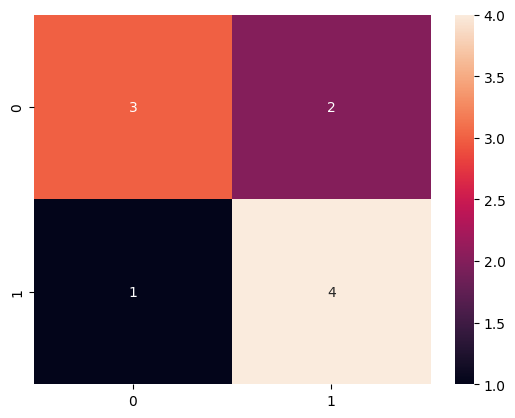

In [28]:
sns.heatmap(cm,annot=True)

<Axes: >

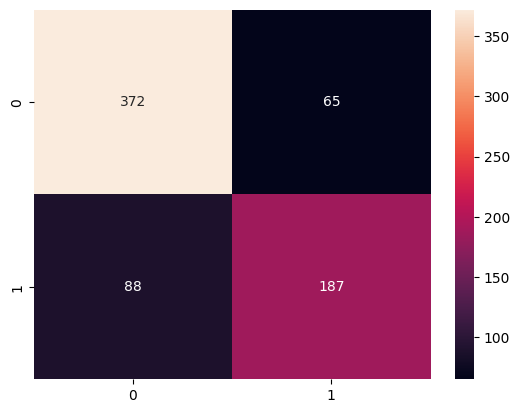

In [29]:
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train)),annot = True,fmt='g')

In [30]:
print(classification_report(yac,ypred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [31]:
print(classification_report(y_train,clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       437
           1       0.74      0.68      0.71       275

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.78      0.79      0.78       712



In [ ]:
fpr,tpr,_ = roc_curve(y_train,clf.predict_proba(x_train)[:,0],pos_label=0)

# fpr, tpr, _ = roc_curve(y_train, clf.predict_proba(x_train)[:,0], pos_label=0)
# clf.predict_proba(x_train)[:, 0]:
# This gives the predicted probability that each sample belongs to class 0.

# roc_curve(y_train, ..., pos_label=0):

# Calculates the FPR and TPR at various thresholds.

# pos_label=0 means we are treating class 0 as the positive class (which is a bit unusual — usually 1 is the positive class).

# 📌 Mathematical meaning:

# For multiple thresholds (e.g. 0.1, 0.2, ..., 0.9), it calculates:

# TPR (Recall) = TP / (TP + FN)

# FPR = FP / (FP + TN)



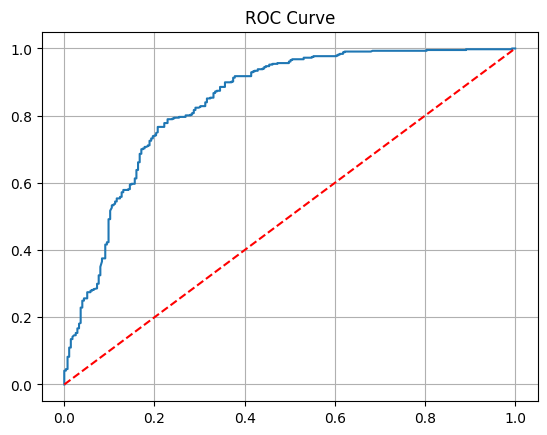

In [ ]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.grid()
plt.title('ROC Curve')
plt.show()

# plt.plot([0,1],[0,1],'r--')
# This plots a dashed red diagonal line from (0,0) to (1,1),
#  representing a random classifier — i.e., 50/50 guessing.



In [34]:
clf.predict_proba(x_train)[:,1]

array([0.09504128, 0.09486153, 0.50252414, 0.25738752, 0.9072471 ,
       0.11549343, 0.48612941, 0.40237098, 0.8876288 , 0.60386383,
       0.3308422 , 0.0790938 , 0.25700414, 0.29983277, 0.729773  ,
       0.51975073, 0.52852004, 0.59714764, 0.06640433, 0.95380475,
       0.48335314, 0.12710824, 0.72413175, 0.9627088 , 0.83265026,
       0.1188924 , 0.3961669 , 0.09080753, 0.92109101, 0.89040497,
       0.16756804, 0.11769376, 0.92947174, 0.48485958, 0.80423511,
       0.16857786, 0.33850316, 0.11791113, 0.28381768, 0.74304197,
       0.14532826, 0.11108794, 0.48041568, 0.50822512, 0.05590179,
       0.10100106, 0.79011752, 0.05791161, 0.12290246, 0.74788313,
       0.10100106, 0.49510469, 0.27949108, 0.31381811, 0.85655047,
       0.06222957, 0.46966146, 0.12317046, 0.04512548, 0.31522732,
       0.10760515, 0.93745398, 0.46347647, 0.24758059, 0.96277224,
       0.67247435, 0.50608218, 0.60996804, 0.71230724, 0.09505533,
       0.33322016, 0.13548907, 0.08788381, 0.72772163, 0.11790

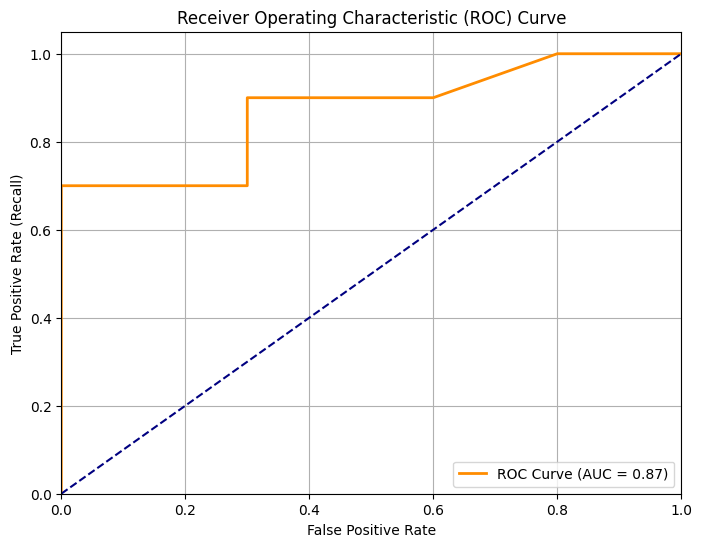

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Same actual and predicted probabilities as before
actual = np.array([
    1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
    1, 1, 0, 1, 0, 0, 1, 1, 0, 0
])

# Instead of hard labels, use prediction **probabilities** (fake example)
# These would normally come from model.predict_proba()[:, 1]
# Here we use random plausible probabilities for illustration:
predicted_prob = np.array([
    0.9, 0.85, 0.4, 0.2, 0.7, 0.8, 0.1, 0.3, 0.2, 0.75,
    0.88, 0.82, 0.3, 0.35, 0.25, 0.1, 0.9, 0.92, 0.2, 0.7
])

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(actual, predicted_prob)

# Compute AUC (Area Under Curve)
auc_score = roc_auc_score(actual, predicted_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
